# Exploratory Data Analysis (EDA)

In [1]:
# Import pandas library
import pandas as pd

# Import numpy library
import numpy as np

# Import seaborn (for plotting graphs and charts)
import seaborn as sns

#!pip install missingno
import missingno as msno

# Ignore warnings, if any
import warnings
warnings.filterwarnings('ignore')

# Import matplot library
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load CSV file from github
loan_data = pd.read_csv("https://raw.githubusercontent.com/socratesk/YHatSchoolOfAI/master/data/bank_term_deposit.csv",sep='\;')

In [3]:
loan_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [4]:
loan_data.shape

(4521, 17)

In [5]:
loan_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
loan_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [8]:
loan_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [9]:
loan_data.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [10]:
loan_data.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [11]:
loan_data.groupby(['marital' ,'education'])['balance'].agg([np.mean, np.std, np.min, np.max])

mean          std  amin   amax
marital  education                                       
divorced primary    1072.721519  2015.425227  -587  10924
         secondary   891.181481  1604.644643  -905  10787
         tertiary   1437.896774  2930.001587 -1148  26306
         unknown    1849.333333  2767.886365  -701  10287
married  primary    1371.638783  3745.968982  -966  71188
         secondary  1272.911002  2629.555915 -2082  26452
         tertiary   1860.719395  3671.462213 -3313  42045
         unknown    1725.547009  3262.312474  -715  21244
single   primary    2065.753425  4732.038743  -887  26965
         secondary  1154.008210  2187.093729 -1164  20453
         tertiary   1754.711538  3279.940945 -1313  27733
         unknown    1562.173913  2314.408466     0  10788

In [12]:
loan_data_cov = loan_data.cov()
loan_data_cov

,age,balance,day,duration,campaign,pdays,previous
age,111.856238,2.668043e+03,-1.557268,-6.504919,-0.169314,-9.417378,-0.062886
balance,2668.042729,9.057922e+06,-215.386074,-12474.023425,-93.370853,2843.538053,133.523091
day,-1.557268,-2.153861e+02,68.024016,-52.785802,4.121894,-77.912251,-0.825706
duration,-6.504919,-1.247402e+04,-52.785802,67525.469519,-55.259760,270.064195,7.956848
campaign,-0.169314,-9.337085e+01,4.121894,-55.259760,9.670897,-28.998832,-0.357251
pdays,-9.417378,2.843538e+03,-77.912251,270.064195,-28.998832,10024.239560,97.932173
previous,-0.062886,1.335231e+02,-0.825706,7.956848,-0.357251,97.932173,2.868153


In [13]:
# Generate a correlation matrix. This returns a dataframe
loan_data_corr = loan_data.corr().abs()
loan_data_corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,0.017853,0.002367,0.005148,0.008894,0.003511
balance,0.083820,1.000000,0.008677,0.015950,0.009976,0.009437,0.026196
day,0.017853,0.008677,1.000000,0.024629,0.160706,0.094352,0.059114
duration,0.002367,0.015950,0.024629,1.000000,0.068382,0.010380,0.018080
campaign,0.005148,0.009976,0.160706,0.068382,1.000000,0.093137,0.067833
pdays,0.008894,0.009437,0.094352,0.010380,0.093137,1.000000,0.577562
previous,0.003511,0.026196,0.059114,0.018080,0.067833,0.577562,1.000000


In [14]:
loan_data_corr.shape

(7, 7)

In [15]:
loan_data_corr.style.background_gradient()

,age,balance,day,duration,campaign,pdays,previous
age,1,0.0838201,0.0178526,0.00236689,0.0051479,0.00889353,0.00351092
balance,0.0838201,1,0.00867705,0.0159499,0.00997617,0.00943668,0.0261964
day,0.0178526,0.00867705,1,0.0246293,0.160706,0.0943515,0.0591144
duration,0.00236689,0.0159499,0.0246293,1,0.068382,0.0103802,0.0180803
campaign,0.0051479,0.00997617,0.160706,0.068382,1,0.0931368,0.0678326
pdays,0.00889353,0.00943668,0.0943515,0.0103802,0.0931368,1,0.577562
previous,0.00351092,0.0261964,0.0591144,0.0180803,0.0678326,0.577562,1


Text(0.5, 1.0, 'Age - Histogram')

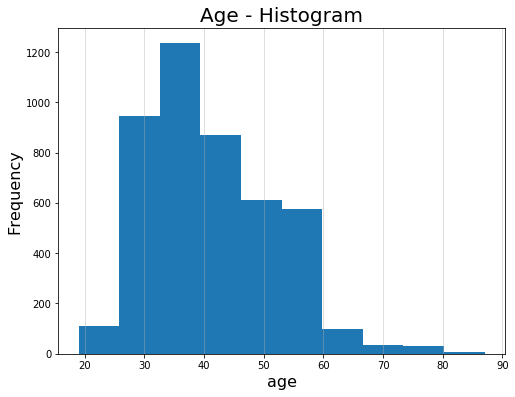

In [16]:
# Set plotting area/ size
plt.figure(figsize=(8, 6))

# Plot histogram

plt.hist(x = loan_data['age'].dropna(),rwidth=1.0)

# Set grid for X-axis
plt.grid(axis='x', alpha=0.5)

# Set X-axis label
plt.xlabel('age', fontdict={'fontsize': 16, 'fontweight': 'medium'})

# Set Y-axis label
plt.ylabel('Frequency', fontdict={'fontsize': 16, 'fontweight': 'medium'})


# Set Histogram title
plt.title('Age - Histogram', fontdict={'fontsize': 20, 'fontweight': 'medium'})

In [29]:
loan_data['bank_ID'] = np.random.randint(1, 99999,  loan_data.shape[0])
loan_data.head(5)

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,bank_ID
0,0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,76430
1,1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,88313
2,2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,70273
3,3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,22110
4,4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,40024


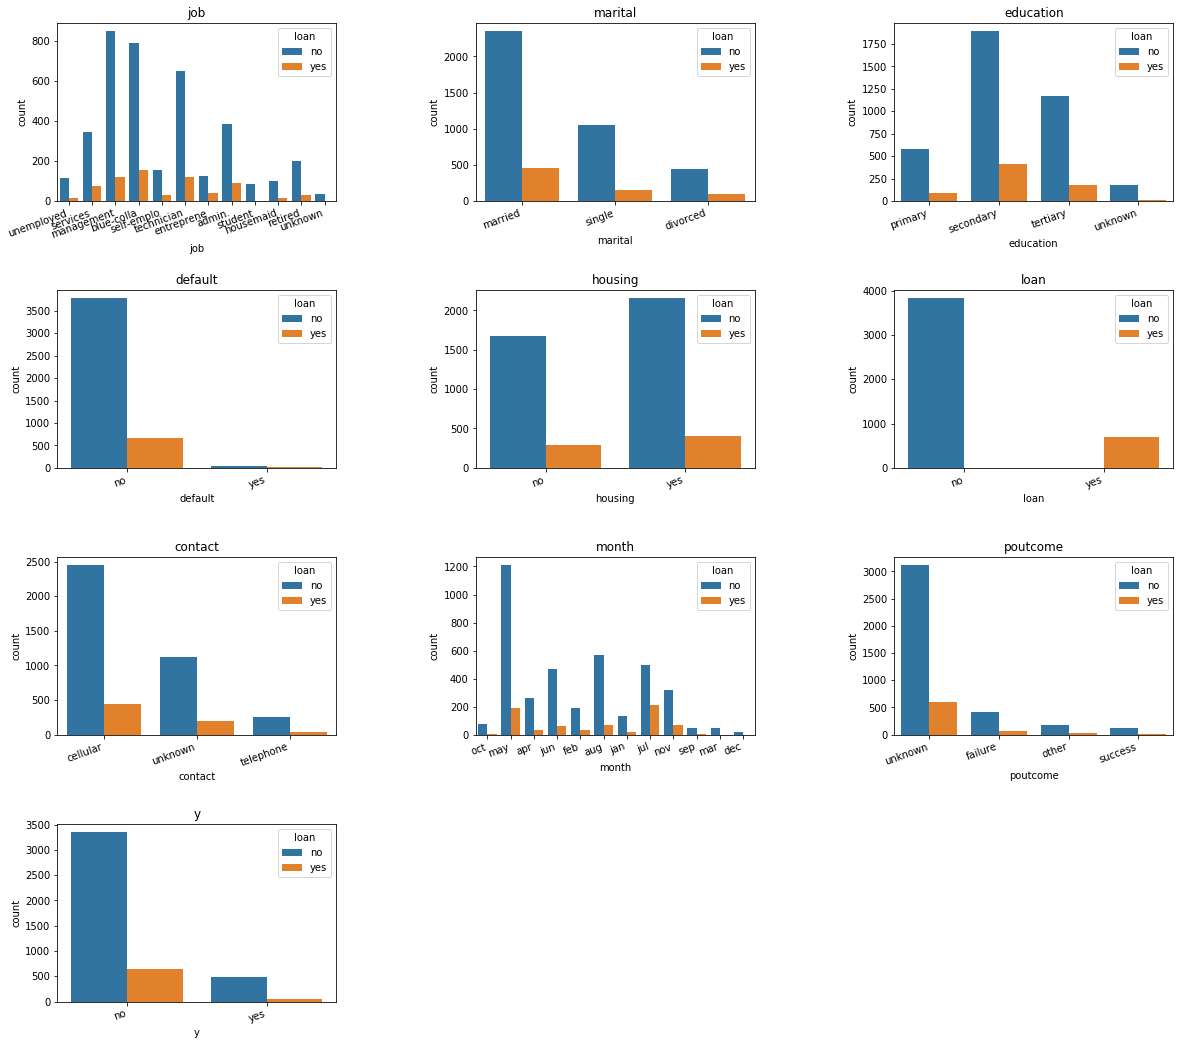

In [32]:
import math

# Plot a count of the categories from each categorical feature split by our prediction class: salary - predclass.
def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    
    # Select the columns that are of type object (categorical features)
    dataset = dataset.select_dtypes(include=[np.object])
    
    # Set what plot style you want to use. seaborn-whitegrid, ggplot, etc.
    # Execute "print(plt.style.available)" to list the difference plotting styles that can be used.
    plt.style.use('fast')
    
    # Set the overall height and width of the plot. Remember the sizes are in inches.
    fig = plt.figure(figsize=(width, height))
    
    # Set the gap between each sub-plots. (width and height spaces)
    fig.subplots_adjust(wspace=wspace, hspace=hspace)
    
    # Compute no of rows required using total features extracted and col input
    rows = math.ceil(float(dataset.shape[1]) / cols)
    
    # Notice that that we are extracting the column name and its position (i) using enumerator.
    for i, column in enumerate(dataset.columns):
        
        # The row and cols represent the grid structure of overall plot. The last param i represent the n-th plot
        ax = fig.add_subplot(rows, cols, i + 1)
        
        # Set the plot's title
        ax.set_title(column)
        
        # Create plot 
        cplot = sns.countplot(x=column, hue=hue, data=dataset)
        
        # Limit the texts of X axis to 10 characters
        x_substr = [str.get_text()[:10] for str in cplot.get_xticklabels()]
        cplot.set_xticklabels(x_substr, rotation=20, ha="right")
        
            
# Call the function to draw 
plot_bivariate_bar(loan_data.drop(['bank_ID'], axis=1), hue='loan', cols=3, width=20, height=18, hspace=0.5, wspace=0.5)